# Project Summary: London Weather Analysis (1979-2023)

## Data Source & Initial Files
* **Source:** Kaggle (`kagglehub`)
* **Dataset:** `zongaobian/london-weather-data-from-1979-to-2023`
* **Raw File:** `london_weather_data_1979_to_2023.csv`
* **Variables Analyzed:** Maximum Temperature (TX), Minimum Temperature (TN), Mean Temperature (TG), and Precipitation (RR).

## Steps Completed
* **Data Preprocessing:** Converted the `DATE` column to datetime objects and extracted the year. Scaled temperature and precipitation variables to standard degrees Celsius and millimeters.
* **Long-Term Trend Analysis:** Calculated the yearly average temperatures (TX, TN, TG) across the 44-year period and plotted line charts with `numpy.polyfit` linear trendlines.
* **Extreme Weather Tracking:** Iteratively defined extreme weather using static thresholds, 75th percentiles, and ultimately strict statistical outliers (Mean + 3 Standard Deviations) to track the frequency of extreme heat and rainfall over time.
* **Statistical Distribution Visualization:** Calculated means and standard deviations for temperature variables. Plotted Kernel Density Estimate (KDE) curves and histograms to visualize data spread and the statistical rarity of extremes.

## Generated Charts
* `long_term_temps_with_trends.png`: Annual mean, min, and max temperatures with linear trendlines.
* `extreme_weather_events_quartiles.png`: Extreme events using the 75th percentile cutoff.
* `extreme_weather_events_3_stddev.png`: Extreme events using the Mean + 3 Standard Deviations cutoff.
* `temperature_distributions_stddev.png`: Histograms and KDE curves for TG, TX, and TN with standard deviation markers.

In [1]:
import pandas as pd
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/salilchand/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/salilchand/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_handle = "zongaobian/london-weather-data-from-1979-to-2023"
path = kagglehub.dataset_download(dataset_handle)

In [3]:
files = os.listdir(path)
print(files)

['london_weather_data_1979_to_2023.csv']


In [4]:
# Create the full path to the specific file
csv_path = os.path.join(path, "london_weather_data_1979_to_2023.csv")

# Load the data
df_weather = pd.read_csv(csv_path)

# Display the first 5 rows
df_weather.head()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0


The next steps are to analyze:
# **Long-Term Temperature Trends**
- added numpy.polyfit to calculate the line of best fit for each temperature metric. 
- Also slightly dimmed the original lines (using alpha=0.5) so the dashed trendlines stand out clearly.

In [12]:
print("Dataset Basic Information:")
print(df_weather.info())

Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16436 non-null  datetime64[ns]
 1   TX      16436 non-null  float64       
 2   Q_TX    16436 non-null  int64         
 3   TN      16436 non-null  float64       
 4   Q_TN    16436 non-null  int64         
 5   TG      16407 non-null  float64       
 6   Q_TG    16436 non-null  int64         
 7   SS      16436 non-null  float64       
 8   Q_SS    16436 non-null  int64         
 9   SD      15361 non-null  float64       
 10  Q_SD    16436 non-null  int64         
 11  RR      16436 non-null  float64       
 12  Q_RR    16436 non-null  int64         
 13  QQ      16411 non-null  float64       
 14  Q_QQ    16436 non-null  int64         
 15  PP      16432 non-null  float64       
 16  Q_PP    16436 non-null  int64         
 17  HU      16379 non-null 

In [13]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df_weather.describe())


Descriptive Statistics:
                      DATE            TX          Q_TX            TN  \
count                16436  16436.000000  16436.000000  16436.000000   
mean   2001-07-01 12:00:00     15.468685      0.068082      7.601643   
min    1979-01-01 00:00:00     -6.200000      0.000000    -11.800000   
25%    1990-04-01 18:00:00     10.600000      0.000000      3.600000   
50%    2001-07-01 12:00:00     15.100000      0.000000      7.800000   
75%    2012-09-30 06:00:00     20.400000      0.000000     11.800000   
max    2023-12-31 00:00:00     40.200000      1.000000     22.300000   
std                    NaN      6.574125      0.251895      5.339205   

               Q_TN            TG          Q_TG            SS     Q_SS  \
count  16436.000000  16407.000000  16436.000000  16436.000000  16436.0   
mean       0.015454     11.537332      0.083962     43.153626      0.0   
min        0.000000     -7.600000      0.000000      0.000000      0.0   
25%        0.000000      7.200

In [14]:
# Check missing values
print("\nMissing Values:")
print(df_weather.isnull().sum())


Missing Values:
DATE       0
TX         0
Q_TX       0
TN         0
Q_TN       0
TG        29
Q_TG       0
SS         0
Q_SS       0
SD      1075
Q_SD       0
RR         0
Q_RR       0
QQ        25
Q_QQ       0
PP         4
Q_PP       0
HU        57
Q_HU       0
CC        18
Q_CC       0
Year       0
dtype: int64


In [5]:
# 1. Format date and extract year
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'], format='%Y%m%d')
df_weather['Year'] = df_weather['DATE'].dt.year

In [6]:
# 2. Convert temperatures to standard °C
for col in ['TX', 'TN', 'TG']:
    df_weather[col] = df_weather[col] / 10.0

In [7]:
# 3. Calculate yearly means
yearly_temps = df_weather.groupby('Year')[['TX', 'TN', 'TG']].mean()

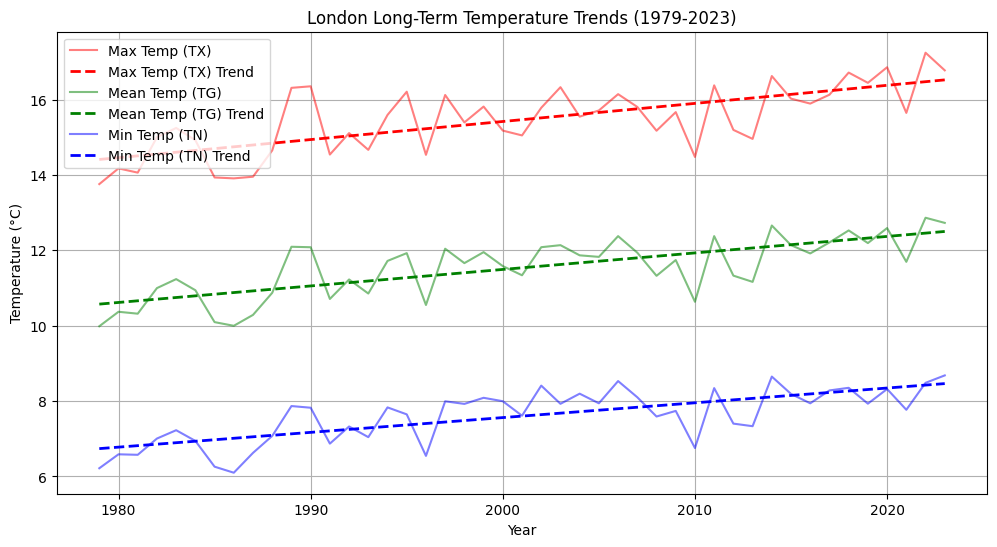

In [8]:
# 4. Plot trends and trendlines
plt.figure(figsize=(12, 6))
colors = {'TX': 'red', 'TG': 'green', 'TN': 'blue'}
labels = {'TX': 'Max Temp (TX)', 'TG': 'Mean Temp (TG)', 'TN': 'Min Temp (TN)'}

for col in ['TX', 'TG', 'TN']:
    # Plot original data
    plt.plot(yearly_temps.index, yearly_temps[col], label=labels[col], color=colors[col], alpha=0.5)
    
    # Calculate and plot trendline
    z = np.polyfit(yearly_temps.index, yearly_temps[col], 1)
    p = np.poly1d(z)
    plt.plot(yearly_temps.index, p(yearly_temps.index), linestyle='--', color=colors[col], linewidth=2, label=f'{labels[col]} Trend')

plt.title('London Long-Term Temperature Trends (1979-2023)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.savefig('long_term_temps_with_trends.png')

The next steps are to analyze:
# **Weather Tracking**
- I used .reindex() to ensure years with zero extreme events are included in the trendline calculation, preventing skewed data.
- The trendlines are plotted as solid, darker lines over the bar charts.
- UK Heatwave Standards: The UK Met Office often uses 28°C to 30°C as the official threshold for declaring a heatwave in the Greater London area.
- Rainfall Rules of Thumb: 20mm is chosen as a general meteorological benchmark for what constitutes a "heavy" day of rain that might cause localized disruptions.

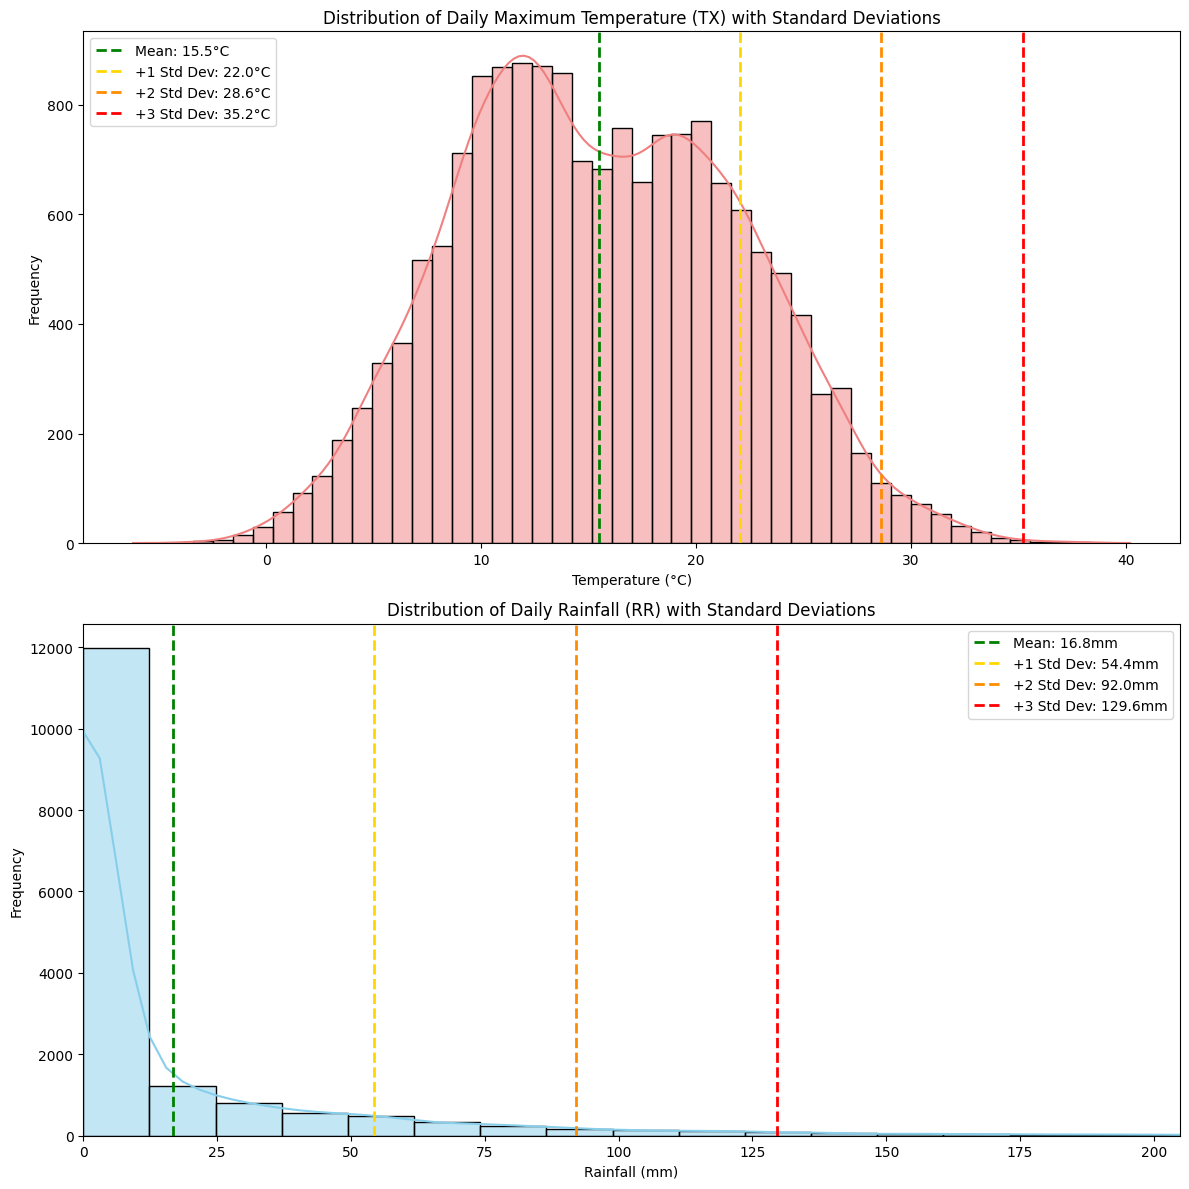

In [9]:

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# --- Plot 1: Maximum Temperature (TX) Distribution ---
tx_mean = df_weather['TX'].mean()
tx_std = df_weather['TX'].std()

sns.histplot(df_weather['TX'], kde=True, ax=ax1, color='lightcoral', bins=50)
ax1.axvline(tx_mean, color='green', linestyle='--', linewidth=2, label=f'Mean: {tx_mean:.1f}°C')
ax1.axvline(tx_mean + tx_std, color='gold', linestyle='--', linewidth=2, label=f'+1 Std Dev: {tx_mean + tx_std:.1f}°C')
ax1.axvline(tx_mean + (2 * tx_std), color='darkorange', linestyle='--', linewidth=2, label=f'+2 Std Dev: {tx_mean + (2 * tx_std):.1f}°C')
ax1.axvline(tx_mean + (3 * tx_std), color='red', linestyle='--', linewidth=2, label=f'+3 Std Dev: {tx_mean + (3 * tx_std):.1f}°C')

ax1.set_title('Distribution of Daily Maximum Temperature (TX) with Standard Deviations')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Frequency')
ax1.legend()

# --- Plot 2: Rainfall (RR) Distribution ---
rr_mean = df_weather['RR'].mean()
rr_std = df_weather['RR'].std()

sns.histplot(df_weather['RR'], kde=True, ax=ax2, color='skyblue', bins=50)
ax2.axvline(rr_mean, color='green', linestyle='--', linewidth=2, label=f'Mean: {rr_mean:.1f}mm')
ax2.axvline(rr_mean + rr_std, color='gold', linestyle='--', linewidth=2, label=f'+1 Std Dev: {rr_mean + rr_std:.1f}mm')
ax2.axvline(rr_mean + (2 * rr_std), color='darkorange', linestyle='--', linewidth=2, label=f'+2 Std Dev: {rr_mean + (2 * rr_std):.1f}mm')
ax2.axvline(rr_mean + (3 * rr_std), color='red', linestyle='--', linewidth=2, label=f'+3 Std Dev: {rr_mean + (3 * rr_std):.1f}mm')

# Limit x-axis for rainfall to better see the distribution and long tail
ax2.set_xlim(0, rr_mean + (5 * rr_std))
ax2.set_title('Distribution of Daily Rainfall (RR) with Standard Deviations')
ax2.set_xlabel('Rainfall (mm)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.savefig('weather_distributions_stddev.png')

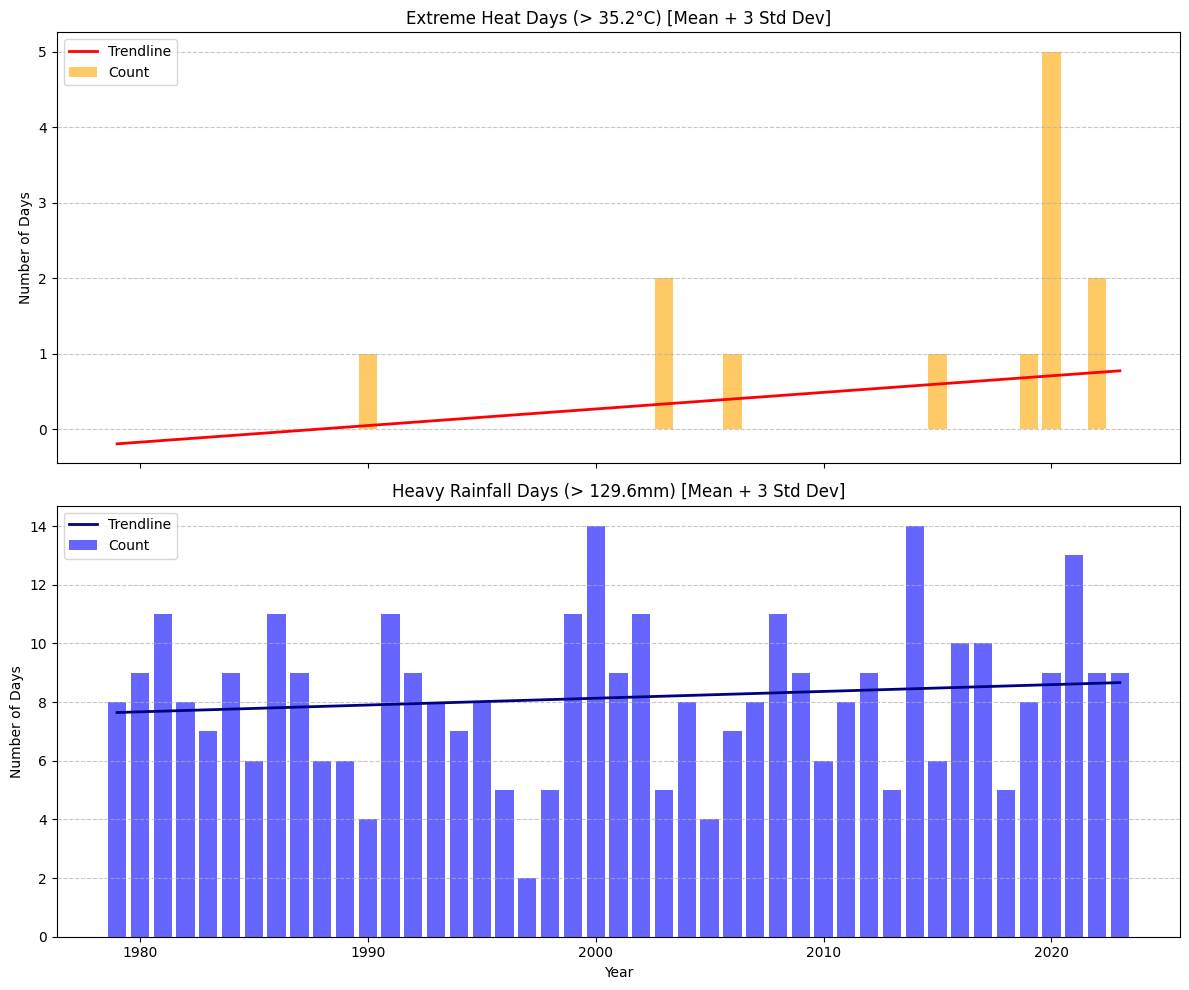

In [10]:
# 1. Calculate the mean and standard deviation for max temp (TX) and rainfall (RR)
tx_mean, tx_std = df_weather['TX'].mean(), df_weather['TX'].std()
rr_mean, rr_std = df_weather['RR'].mean(), df_weather['RR'].std()

# 2. Define extreme thresholds as 3 standard deviations above the mean
tx_threshold = tx_mean + (3 * tx_std)
rr_threshold = rr_mean + (3 * rr_std)

# 3. Filter for extreme days based on these stricter statistical thresholds
heatwave_days = df_weather[df_weather['TX'] > tx_threshold]
heavy_rain_days = df_weather[df_weather['RR'] > rr_threshold]

# 4. Count extreme events per year, filling years with 0 events
all_years = df_weather['Year'].unique()
heat_counts = heatwave_days.groupby('Year').size().reindex(all_years, fill_value=0)
rain_counts = heavy_rain_days.groupby('Year').size().reindex(all_years, fill_value=0)

# 5. Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Extreme Heat + Trendline
ax1.bar(heat_counts.index, heat_counts.values, color='orange', alpha=0.6, label='Count')
z_heat = np.polyfit(heat_counts.index, heat_counts.values, 1)
ax1.plot(heat_counts.index, np.poly1d(z_heat)(heat_counts.index), color='red', linewidth=2, label='Trendline')
ax1.set_title(f'Extreme Heat Days (> {tx_threshold:.1f}°C) [Mean + 3 Std Dev]')
ax1.set_ylabel('Number of Days')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()

# Plot Heavy Rain + Trendline
ax2.bar(rain_counts.index, rain_counts.values, color='blue', alpha=0.6, label='Count')
z_rain = np.polyfit(rain_counts.index, rain_counts.values, 1)
ax2.plot(rain_counts.index, np.poly1d(z_rain)(rain_counts.index), color='navy', linewidth=2, label='Trendline')
ax2.set_title(f'Heavy Rainfall Days (> {rr_threshold:.1f}mm) [Mean + 3 Std Dev]')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Days')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.savefig('extreme_weather_events_3_stddev.png')